In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [8]:
df = pd.read_csv('Downloads/HR_comma_sep.csv')

In [9]:


columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)




Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [10]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


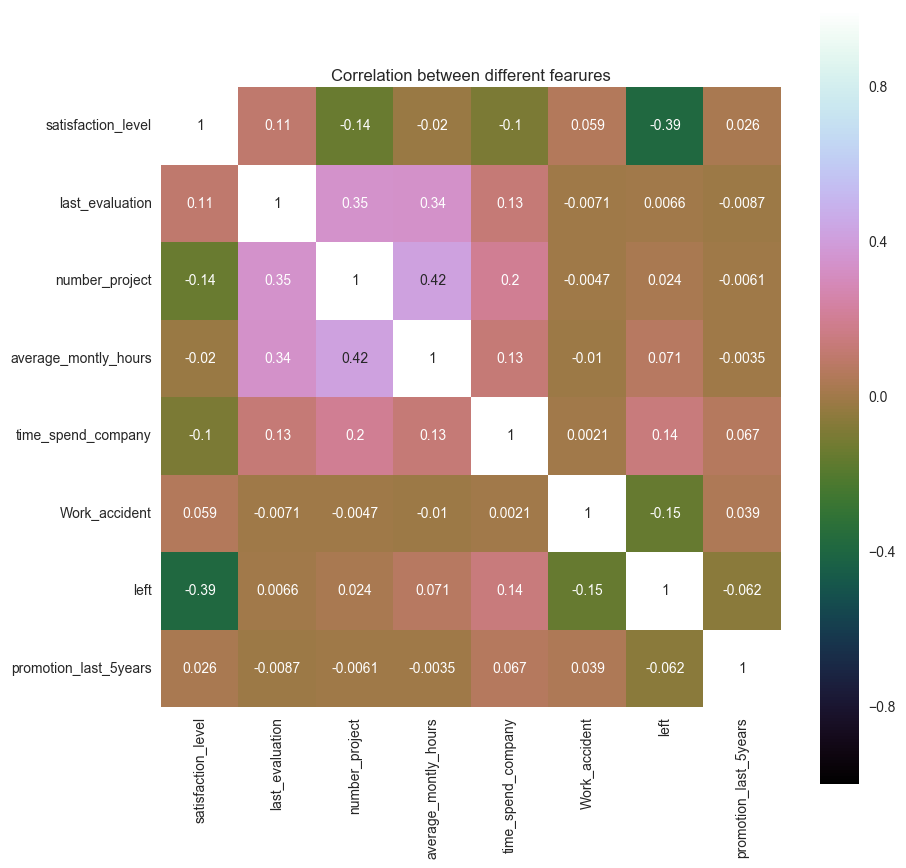

In [12]:


correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')


In [13]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:


df_drop=df.drop(labels=['sales','salary'],axis=1)
df_drop.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [16]:
cols = df_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [17]:
df_drop = df_drop.reindex(columns= cols)

In [26]:
X = df_drop.iloc[:,0:8].values
y = df_drop.iloc[:,-1].values
X,y

(array([[ 0.38,  0.53,  2.  , ...,  0.  ,  1.  ,  0.  ],
        [ 0.8 ,  0.86,  5.  , ...,  0.  ,  1.  ,  0.  ],
        [ 0.11,  0.88,  7.  , ...,  0.  ,  1.  ,  0.  ],
        ..., 
        [ 0.37,  0.53,  2.  , ...,  0.  ,  1.  ,  0.  ],
        [ 0.11,  0.96,  6.  , ...,  0.  ,  1.  ,  0.  ],
        [ 0.37,  0.52,  2.  , ...,  0.  ,  1.  ,  0.  ]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [27]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
np.shape(X)

(14999, 8)

In [29]:
np.shape(y)

(14999,)

In [30]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [31]:
X_std

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
         1.788917  , -0.14741182],
       ..., 
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
         1.788917  , -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182]])

In [32]:


mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)



Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
  -0.38840088  0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
   0.00656756 -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
   0.02378877 -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
   0.07129193 -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.14483183  0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
  -0.15463194  0.03924805]
 [-0.38840088  0.00656756  0.02378877  0.07129193  0.14483183 -0.15463194
   1.00006668 -0.06179223]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
  -0.06179223  1.00006668]]


In [33]:
X_cov = np.cov(X_std.T)

In [34]:
X_cov


array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115, -0.38840088,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476,  0.00656756, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086,  0.02378877, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356,  0.07129193, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.14483183,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668, -0.15463194,  0.03924805],
       [-0.38840088,  0.00656756,  0.02378877,  0.07129193,  0.14483183,
        -0.15463194,  1.00006668, -0.06179223],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805, -0.06179223,  1.00006668]])

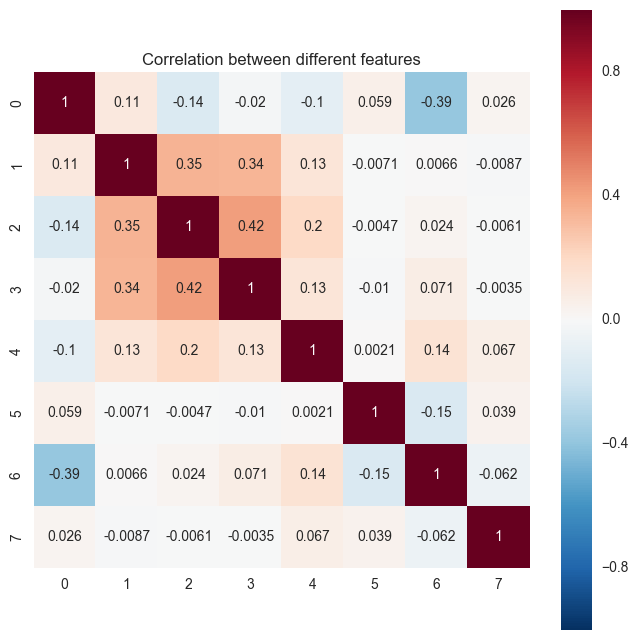

In [43]:
plt.figure(figsize=(8,8))

sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='RdBu_r')
plt.title('Correlation between different features')


In [44]:


eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)



Eigenvectors 
[[-0.18956186 -0.60825815  0.51043559  0.14578963 -0.2534991  -0.32268329
  -0.2910217   0.2433296 ]
 [ 0.46363715 -0.31222881 -0.27367838  0.15715943 -0.10307248 -0.06471173
   0.54777287  0.52257837]
 [ 0.55704703 -0.12254292  0.58883958  0.0129521   0.09858338  0.1887942
   0.24157676 -0.47335058]
 [ 0.52559587 -0.17853674 -0.30588994  0.11339814  0.0120681   0.25349244
  -0.72147388  0.02274205]
 [ 0.33395132  0.11709262 -0.11038416 -0.44415687 -0.04569912 -0.79303045
  -0.09314767 -0.16013636]
 [-0.06443923 -0.28140442  0.07016424 -0.42577604  0.81315664  0.06549289
  -0.02938544  0.25312908]
 [ 0.2163394   0.61631274  0.45356155  0.01069646  0.00816191  0.01364792
  -0.16219105  0.58392171]
 [-0.00870881 -0.11358933  0.03780465 -0.74989628 -0.50186771  0.39801173
   0.02283486  0.11154387]]

Eigenvalues 
[ 1.86103997  1.46419116  0.47748369  1.06065738  0.95604748  0.84555567
  0.62652988  0.70902817]


In [45]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [47]:
eig_pairs

[(1.8610399673428644,
  array([-0.18956186,  0.46363715,  0.55704703,  0.52559587,  0.33395132,
         -0.06443923,  0.2163394 , -0.00870881])),
 (1.4641911571613264,
  array([-0.60825815, -0.31222881, -0.12254292, -0.17853674,  0.11709262,
         -0.28140442,  0.61631274, -0.11358933])),
 (0.47748368692167564,
  array([ 0.51043559, -0.27367838,  0.58883958, -0.30588994, -0.11038416,
          0.07016424,  0.45356155,  0.03780465])),
 (1.0606573786654165,
  array([ 0.14578963,  0.15715943,  0.0129521 ,  0.11339814, -0.44415687,
         -0.42577604,  0.01069646, -0.74989628])),
 (0.95604748470679324,
  array([-0.2534991 , -0.10307248,  0.09858338,  0.0120681 , -0.04569912,
          0.81315664,  0.00816191, -0.50186771])),
 (0.84555567328443648,
  array([-0.32268329, -0.06471173,  0.1887942 ,  0.25349244, -0.79303045,
          0.06549289,  0.01364792,  0.39801173])),
 (0.62652988219159689,
  array([-0.2910217 ,  0.54777287,  0.24157676, -0.72147388, -0.09314767,
         -0.029385

In [48]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [49]:
eig_pairs


[(1.8610399673428644,
  array([-0.18956186,  0.46363715,  0.55704703,  0.52559587,  0.33395132,
         -0.06443923,  0.2163394 , -0.00870881])),
 (1.4641911571613264,
  array([-0.60825815, -0.31222881, -0.12254292, -0.17853674,  0.11709262,
         -0.28140442,  0.61631274, -0.11358933])),
 (1.0606573786654165,
  array([ 0.14578963,  0.15715943,  0.0129521 ,  0.11339814, -0.44415687,
         -0.42577604,  0.01069646, -0.74989628])),
 (0.95604748470679324,
  array([-0.2534991 , -0.10307248,  0.09858338,  0.0120681 , -0.04569912,
          0.81315664,  0.00816191, -0.50186771])),
 (0.84555567328443648,
  array([-0.32268329, -0.06471173,  0.1887942 ,  0.25349244, -0.79303045,
          0.06549289,  0.01364792,  0.39801173])),
 (0.70902817417981978,
  array([ 0.2433296 ,  0.52257837, -0.47335058,  0.02274205, -0.16013636,
          0.25312908,  0.58392171,  0.11154387])),
 (0.62652988219159689,
  array([-0.2910217 ,  0.54777287,  0.24157676, -0.72147388, -0.09314767,
         -0.029385

In [51]:


tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

tot,var_exp

(8.0005334044539271,
 [23.26144862174835,
  18.301169223869572,
  13.257333293239482,
  11.949796799480369,
  10.568741239349272,
  8.8622612810428514,
  7.8311013843502657,
  5.9681481569198711])

ValueError: incompatible sizes: argument 'height' must be length 7 or scalar

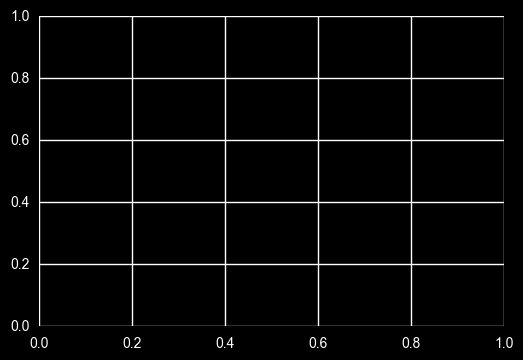

In [52]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
